In [1]:
import pandas as pd
from numpy import nan

In [2]:
#traceroute -m 60 from us devices to far distance sites 
#(choicetv.co.nz, tvnz.co.nz, www.nhk.or.jp, irokotv.com, www.lemonde.fr, globo.com, etc.)
tr1=pd.read_json("https://projectbismark.net:8080/bismark/status/wsj/f6d25a080a/tr/trparse1.cities.output.json") 

In [3]:
#traceroute -m 40 from us devices to Netflix, Youtube, Facebook, Amazon, etc
tr2=pd.read_json("https://projectbismark.net:8080/bismark/status/wsj/f6d25a080a/tr/trparse2.cities.output.json")

In [4]:
tr=pd.read_json('https://projectbismark.net:8080/bismark/status/wsj/f6d25a080a/tr/traceroute.ta.json')
#pd.DataFrame({'size':tr.groupby(['DestHost','Meta']).size()})
tr_desthost_meta=tr.groupby(['DestHost','Meta']).size().to_frame().reset_index().rename(columns={0:'Size'})

In [27]:
#device information (di)
di=pd.read_csv('https://projectbismark.net:8080/bismark/status/wsj/f6d25a080a/tr/devinfo1.csv')
di

,Unnamed: 0,bid,sid,city_x,ip,country_x,v,datels,timels,status,city_y,state,country_y,lat,long,isp,org,domain,ASorg,hits
0,0,PI001E063557EB,test_1521,nyc,209.150.50.142,US,612,2019-05-12,09:51:01,down,New York,NY,US,40.7503,-74.0014,RCN,RCN,rcncustomer.com,RCN,NaN
1,1,PIB827EB1413A0,test_9702,nyc,173.68.99.182,US,612,2019-01-11,01:43:08,down,New York,NY,US,40.7503,-74.0014,Verizon Fios,Verizon Fios,verizon.net,MCI Communications Services Inc. d/b/a Verizon Business,NaN
2,2,PI001E06355476,test_5826,dallas,99.168.102.149,US,612,2019-06-15,18:02:24,down,Arlington,TX,US,32.6548,-97.0920,AT&T U-verse,AT&T U-verse,sbcglobal.net,AT&T Services Inc.,NaN
3,3,PIB827EB24F399,test_1622,san francisco,172.9.104.189,US,612,2019-05-12,14:53:02,down,San Francisco,CA,US,37.8007,-122.4097,AT&T U-verse,AT&T U-verse,sbcglobal.net,AT&T Services Inc.,NaN
4,4,PIB827EBEAE752,test_8973,(upstate NY somewhere),50.49.196.221,US,612,2019-04-16,01:15:02,down,Middletown,NY,US,41.4535,-74.4774,Frontier Communications,Frontier Communications,NaN,Frontier Communications of America Inc.,NaN
5,5,PI001E063558B3,test_4491,chicago,67.186.99.14,US,612,2019-04-13,07:26:13,down,Chicago,IL,US,41.9409,-87.6532,Comcast Cable,Comcast Cable,comcast.net,Comcast Cable Communications LLC,NaN
6,6,PIB827EB87284E,test_5458,maplewood nj,24.184.55.106,US,612,2019-06-19,03:21:19,up,Chatham,NJ,US,40.7305,-74.4017,Optimum Online,Optimum Online,optonline.net,Cablevision Systems Corp.,NaN
7,7,PIB827EB5E8955,test_1831,detroit area,75.38.219.24,US,612,2019-06-19,03:21:22,up,Rochester,MI,US,42.7262,-83.1566,AT&T U-verse,AT&T U-verse,sbcglobal.net,AT&T Services Inc.,NaN
8,8,PIB827EBA56FEE,test_4818,houston,76.193.240.64,US,612,2019-03-27,14:26:23,down,Houston,TX,US,29.7912,-95.4182,AT&T U-verse,AT&T U-verse,sbcglobal.net,AT&T Services Inc.,NaN
9,9,PIB827EB0C88E4,test_3515,chicago area,216.80.25.62,US,612,2019-06-19,03:21:20,up,Chicago,IL,US,41.9555,-87.6613,RCN,RCN,rcncustomer.com,RCN,NaN


In [6]:
di_dict=di.set_index('sid').T.to_dict()
di_isp=di[['sid','isp', 'city_x', 'city_y', 'state']]
di_isp.tail()

,sid,isp,city_x,city_y,state
52,test_1166,Verizon Fios,jersey city,Jersey City,NJ
53,test_1267,RCN,nyc,New York,NY
54,test_1666,Verizon Fios,new jersey,Morrisville,PA
55,test_7384,RCN,nyc,New York,NY
56,test_4302,Comcast Cable,NaN,Washington,DC


In [7]:
listOfBigCDNs=["Amazon CloudFront", "Akamai Technologies", "Cloudflare", "Level 3 Communications", "Google Cloud", "Limelight Networks", "Fastly", "StackPath"]
listOfBigCDNs

['Amazon CloudFront',
 'Akamai Technologies',
 'Cloudflare',
 'Level 3 Communications',
 'Google Cloud',
 'Limelight Networks',
 'Fastly',
 'StackPath']

In [8]:
def unique(input):
    output=[]
    for i in input:
        if i == '':
            continue
        if i not in output:
            output.append(i)
    return output

def retbigcdns(input):
    output=[]
    for i in input:
        if i == '':
            continue
        if i in listOfBigCDNs:
            if i not in output:
                output.append(i)
    return output

def retbigisps(input):
    output=[]
    #print(type(isp))
    for i in input:
        if i == '':
            continue
        if i not in listOfBigCDNs:
            if i not in output:
                output.append(i)
    return output

tr1=pd.merge(tr1, di_isp, left_on='id', right_on='sid') #
tr1['PercentOfUnresolvedCities']=tr1.apply(lambda r: r['Cities'].count('')/len(r['Cities']) if len(r['Cities'])>0 else 0, axis=1)
tr1['PercentOfUnresolvedISPs']=tr1.apply(lambda r: r['ISPs'].count('')/len(r['ISPs']) if len(r['ISPs'])>0 else 0, axis=1)
tr1['UniqueCities']=tr1.apply(lambda r: unique(r['Cities']), axis=1)
tr1['UniqueCities_len']=tr1.apply(lambda r: len(r['UniqueCities']), axis=1)
tr1['UniqueISPs']=tr1.apply(lambda r: unique(r['ISPs']), axis=1)
tr1['UniqueISPs_len']=tr1.apply(lambda r: len(r['UniqueISPs']), axis=1)
tr1['ListOfBigCDNs']=tr1.apply(lambda r: retbigcdns(r['ISPs']), axis=1)
tr1['NbrOfBigCDNs']=tr1.apply(lambda r: len(r['ListOfBigCDNs']), axis=1)
tr1['ListOfBigISPs']=tr1.apply(lambda r: retbigisps(r['ISPs']), axis=1)
tr1['NbrOfBigISPs']=tr1.apply(lambda r: len(r['ListOfBigISPs']), axis=1)


tr2=pd.merge(tr2, di_isp, left_on='id', right_on='sid')
tr2=pd.merge(tr2, tr_desthost_meta, left_on='DestHost', right_on='DestHost')
tr2['PercentOfUnresolvedCities']=tr2.apply(lambda r: r['Cities'].count('')/len(r['Cities']) if len(r['Cities'])>0 else 0, axis=1)
tr2['PercentOfUnresolvedISPs']=tr2.apply(lambda r: r['ISPs'].count('')/len(r['ISPs']) if len(r['ISPs'])>0 else 0, axis=1)
tr2['UniqueCities']=tr2.apply(lambda r: unique(r['Cities']), axis=1)
tr2['UniqueCities_len']=tr2.apply(lambda r: len(r['UniqueCities']), axis=1)
tr2['UniqueISPs']=tr2.apply(lambda r: unique(r['ISPs']), axis=1)
tr2['UniqueISPs_len']=tr2.apply(lambda r: len(r['UniqueISPs']), axis=1)
tr2['ListOfBigCDNs']=tr2.apply(lambda r: retbigcdns(r['ISPs']), axis=1)
tr2['NbrOfBigCDNs']=tr2.apply(lambda r: len(r['ListOfBigCDNs']), axis=1)
tr2['ListOfBigISPs']=tr2.apply(lambda r: retbigisps(r['ISPs']), axis=1)
tr2['NbrOfBigISPs']=tr2.apply(lambda r: len(r['ListOfBigISPs']), axis=1)
tr2


,Cities,DestHost,DestHostGeoIP,DestHostPing,DestHostname,DestHostnamePing,GeoIP,HopNames,Hops,ISPs,...,PercentOfUnresolvedCities,PercentOfUnresolvedISPs,UniqueCities,UniqueCities_len,UniqueISPs,UniqueISPs_len,ListOfBigCDNs,NbrOfBigCDNs,ListOfBigISPs,NbrOfBigISPs
0,"[, Staatsburg NY US, , , , , , , , , Mountain ...",104.154.126.118,"{'isp': 'Google Cloud', 'org': 'Google Cloud',...",104.154.126.118,104.154.126.118,104.154.126.118,"[{}, {'isp': 'CSC Holdings', 'org': 'CSC Holdi...","[192.168.143.1, 67.59.255.197, ool-4353e714.dy...","[192.168.143.1, 67.59.255.197, 67.83.231.20, 6...","[CSC Holdings, Optimum Online, CSC Holdings, C...",...,0.833333,0.0,"[Staatsburg NY US, Mountain View CA US]",2,"[CSC Holdings, Optimum Online, Google]",3,[],0,"[CSC Holdings, Optimum Online, Google]",3
1,"[, Staatsburg NY US, , , , , , , , Mountain Vi...",104.154.126.118,"{'isp': 'Google Cloud', 'org': 'Google Cloud',...",104.154.126.118,104.154.126.118,104.154.126.118,"[{}, {'isp': 'CSC Holdings', 'org': 'CSC Holdi...","[192.168.143.1, 67.59.255.197, ool-4353e714.dy...","[192.168.143.1, 67.59.255.197, 67.83.231.20, 6...","[CSC Holdings, Optimum Online, CSC Holdings, C...",...,0.818182,0.0,"[Staatsburg NY US, Mountain View CA US]",2,"[CSC Holdings, Optimum Online, Google]",3,[],0,"[CSC Holdings, Optimum Online, Google]",3
2,"[, Staatsburg NY US, , , , , , , , , , ]",104.154.126.118,"{'isp': 'Google Cloud', 'org': 'Google Cloud',...",104.154.126.118,104.154.126.118,104.154.126.118,"[{}, {'isp': 'CSC Holdings', 'org': 'CSC Holdi...","[192.168.143.1, 67.59.255.197, ool-4353e714.dy...","[192.168.143.1, 67.59.255.197, 67.83.231.20, 6...","[CSC Holdings, Optimum Online, CSC Holdings, C...",...,0.916667,0.0,[Staatsburg NY US],1,"[CSC Holdings, Optimum Online, Google]",3,[],0,"[CSC Holdings, Optimum Online, Google]",3
3,"[, Staatsburg NY US, , , , , , , , , ]",104.154.126.248,"{'isp': 'Google Cloud', 'org': 'Google Cloud',...",104.154.126.248,104.154.126.248,104.154.126.248,"[{}, {'isp': 'CSC Holdings', 'org': 'CSC Holdi...","[192.168.143.1, 67.59.255.197, ool-4353e714.dy...","[192.168.143.1, 67.59.255.197, 67.83.231.20, 6...","[CSC Holdings, Optimum Online, CSC Holdings, C...",...,0.909091,0.0,[Staatsburg NY US],1,"[CSC Holdings, Optimum Online, Google]",3,[],0,"[CSC Holdings, Optimum Online, Google]",3
4,"[, Staatsburg NY US, , , , , , , , , ]",104.154.126.248,"{'isp': 'Google Cloud', 'org': 'Google Cloud',...",104.154.126.248,104.154.126.248,104.154.126.248,"[{}, {'isp': 'CSC Holdings', 'org': 'CSC Holdi...","[192.168.143.1, 67.59.255.197, ool-4353e714.dy...","[192.168.143.1, 67.59.255.197, 67.83.231.20, 6...","[CSC Holdings, Optimum Online, CSC Holdings, C...",...,0.909091,0.0,[Staatsburg NY US],1,"[CSC Holdings, Optimum Online, Google]",3,[],0,"[CSC Holdings, Optimum Online, Google]",3
5,"[, Staatsburg NY US, , , , , , , , ]",104.154.126.248,"{'isp': 'Google Cloud', 'org': 'Google Cloud',...",104.154.126.248,104.154.126.248,104.154.126.248,"[{}, {'isp': 'CSC Holdings', 'org': 'CSC Holdi...","[192.168.143.1, 67.59.255.197, ool-4353e714.dy...","[192.168.143.1, 67.59.255.197, 67.83.231.20, 6...","[CSC Holdings, Optimum Online, CSC Holdings, C...",...,0.900000,0.0,[Staatsburg NY US],1,"[CSC Holdings, Optimum Online, Google]",3,[],0,"[CSC Holdings, Optimum Online, Google]",3
6,"[New York NY US, New York NY US, , , , New Yor...",104.154.126.248,"{'isp': 'Google Cloud', 'org': 'Google Cloud',...",104.154.126.248,104.154.126.248,104.154.126.248,"[{'isp': 'Spectrum', 'org': 'Spectrum', 'count...","[be63.nydbny7001h.nyc.rr.com, agg111.nyclnyrg0...","[68.173.202.116, 68.173.198.104, 66.109.6.78, ...","[Spectrum, Spectrum, Spectrum, Spectrum, Spect...",...,0.692308,0.0,"[New York NY US, Pryor OK US]",2,"[Spectrum, Tata Communications (america), Google]",3,[],0,"[Spectrum, Tata Communications (america), Google]",3
7,"[New York NY US, New York NY US, Englewood CO ...",104.154.126.248,"{'isp': 'Google Cloud', 'org': 'Google Cloud',...",104.154.126.248,104.154.126.2

In [9]:
#paths that were fully resolved in their city names (probably ISPs too)
tr1_sites=tr1[tr1['Cities'].apply(lambda x: '' not in x)].reset_index()
tr1_sites.tail()

,index,Cities,DestHost,DestHostGeoIP,DestHostPing,DestHostname,DestHostnamePing,GeoIP,HopNames,Hops,...,PercentOfUnresolvedCities,PercentOfUnresolvedISPs,UniqueCities,UniqueCities_len,UniqueISPs,UniqueISPs_len,ListOfBigCDNs,NbrOfBigCDNs,ListOfBigISPs,NbrOfBigISPs
6,500,"[Chicago IL US, Albrightsville PA US, Albright...",151.101.186.217,"{'lat': '41.8483', 'city': 'Chicago', 'ASorg':...",151.101.186.217,www.lemonde.fr,s2.shared.global.fastly.net,"[{}, {'lat': '41.871', 'city': 'Chicago', 'ASo...","[10.48.8.1, 216.80.78.75, hge0-0-0-1.core1.chg...","[10.48.8.1, 216.80.78.75, 207.172.19.158, 207....",...,0.0,0.0,"[Chicago IL US, Albrightsville PA US]",2,[RCN],1,[],0,[RCN],1
7,501,"[Chicago IL US, Albrightsville PA US, Albright...",151.101.186.217,"{'lat': '41.8483', 'city': 'Chicago', 'ASorg':...",151.101.186.217,www.lemonde.fr,s2.shared.global.fastly.net,"[{}, {'lat': '41.871', 'city': 'Chicago', 'ASo...","[10.48.8.1, 216.80.78.75, hge0-0-0-1.core2.chg...","[10.48.8.1, 216.80.78.75, 207.172.19.166, 207....",...,0.0,0.0,"[Chicago IL US, Albrightsville PA US]",2,[RCN],1,[],0,[RCN],1
8,502,"[Chicago IL US, Albrightsville PA US, Albright...",151.101.186.217,"{'lat': '41.8483', 'city': 'Chicago', 'ASorg':...",151.101.186.217,www.lemonde.fr,s2.shared.global.fastly.net,"[{}, {'lat': '41.871', 'city': 'Chicago', 'ASo...","[10.48.8.1, 216.80.78.75, hge0-0-0-1.core2.chg...","[10.48.8.1, 216.80.78.75, 207.172.19.166, 207....",...,0.0,0.0,"[Chicago IL US, Albrightsville PA US]",2,[RCN],1,[],0,[RCN],1
9,503,"[Chicago IL US, Albrightsville PA US, Albright...",151.101.186.217,"{'lat': '41.8483', 'city': 'Chicago', 'ASorg':...",151.101.186.217,www.lemonde.fr,s2.shared.global.fastly.net,"[{}, {'lat': '41.871', 'city': 'Chicago', 'ASo...","[10.48.8.1, 216.80.78.75, hge0-0-0-1.core2.chg...","[10.48.8.1, 216.80.78.75, 207.172.19.166, 207....",...,0.0,0.0,"[Chicago IL US, Albrightsville PA US]",2,[RCN],1,[],0,[RCN],1
10,504,"[Chicago IL US, Albrightsville PA US, Albright...",151.101.186.217,"{'lat': '41.8483', 'city': 'Chicago', 'ASorg':...",151.101.186.217,www.lemonde.fr,s2.shared.global.fastly.net,"[{}, {'lat': '41.871', 'city': 'Chicago', 'ASo...","[10.48.8.1, 216.80.78.75, hge0-0-0-1.core2.chg...","[10.48.8.1, 216.80.78.75, 207.172.19.166, 207....",...,0.0,0.0,"[Chicago IL US, Albrightsville PA US]",2,[RCN],1,[],0,[RCN],1


In [10]:
#paths that were fully resolved in their city names (most likely ISPs too)
tr2_apps=tr2[tr2['Cities'].apply(lambda x: '' not in x)].reset_index()
tr2_apps.tail()

,index,Cities,DestHost,DestHostGeoIP,DestHostPing,DestHostname,DestHostnamePing,GeoIP,HopNames,Hops,...,PercentOfUnresolvedCities,PercentOfUnresolvedISPs,UniqueCities,UniqueCities_len,UniqueISPs,UniqueISPs_len,ListOfBigCDNs,NbrOfBigCDNs,ListOfBigISPs,NbrOfBigISPs
1250,16051,"[Park Ridge IL US, Reynoldsburg OH US, Reynold...",99.84.254.40,"{'isp': 'Amazon CloudFront', 'org': 'Amazon Cl...",99.84.254.40,99.84.254.40,99.84.254.40,"[{}, {'isp': 'WideOpenWest', 'org': 'WideOpenW...","[192.168.0.1, d47-69-1-72.try.wideopenwest.com...","[192.168.0.1, 69.47.72.1, 76.73.171.37, 76.73....",...,0.0,0.0,"[Park Ridge IL US, Reynoldsburg OH US, Huntsvi...",8,"[WideOpenWest, Amazon.com, Amazon CloudFront]",3,[Amazon CloudFront],1,"[WideOpenWest, Amazon.com]",2
1251,16052,"[Park Ridge IL US, Reynoldsburg OH US, Reynold...",99.84.254.40,"{'isp': 'Amazon CloudFront', 'org': 'Amazon Cl...",99.84.254.40,99.84.254.40,99.84.254.40,"[{}, {'isp': 'WideOpenWest', 'org': 'WideOpenW...","[192.168.0.1, d47-69-1-72.try.wideopenwest.com...","[192.168.0.1, 69.47.72.1, 76.73.171.37, 76.73....",...,0.0,0.0,"[Park Ridge IL US, Reynoldsburg OH US, Huntsvi...",8,"[WideOpenWest, Amazon.com, Amazon CloudFront]",3,[Amazon CloudFront],1,"[WideOpenWest, Amazon.com]",2
1252,16053,"[Park Ridge IL US, Reynoldsburg OH US, Reynold...",99.84.254.95,"{'isp': 'Amazon CloudFront', 'org': 'Amazon Cl...",99.84.254.95,99.84.254.95,99.84.254.95,"[{}, {'isp': 'WideOpenWest', 'org': 'WideOpenW...","[192.168.0.1, d47-69-1-72.try.wideopenwest.com...","[192.168.0.1, 69.47.72.1, 76.73.171.37, 76.73....",...,0.0,0.0,"[Park Ridge IL US, Reynoldsburg OH US, Huntsvi...",8,"[WideOpenWest, Amazon.com, Amazon CloudFront]",3,[Amazon CloudFront],1,"[WideOpenWest, Amazon.com]",2
1253,16054,"[Park Ridge IL US, Reynoldsburg OH US, Reynold...",99.84.254.95,"{'isp': 'Amazon CloudFront', 'org': 'Amazon Cl...",99.84.254.95,99.84.254.95,99.84.254.95,"[{}, {'isp': 'WideOpenWest', 'org': 'WideOpenW...","[192.168.0.1, d47-69-1-72.try.wideopenwest.com...","[192.168.0.1, 69.47.72.1, 76.73.171.37, 76.73....",...,0.0,0.0,"[Park Ridge IL US, Reynoldsburg OH US, Huntsvi...",8,"[WideOpenWest, Amazon.com, Amazon CloudFront]",3,[Amazon CloudFront],1,"[WideOpenWest, Amazon.com]",2
1254,16055,"[Park Ridge IL US, Reynoldsburg OH US, Reynold...",99.84.254.95,"{'isp': 'Amazon CloudFront', 'org': 'Amazon Cl...",99.84.254.95,99.84.254.95,99.84.254.95,"[{}, {'isp': 'WideOpenWest', 'org': 'WideOpenW...","[192.168.0.1, d47-69-1-72.try.wideopenwest.com...","[192.168.0.1, 69.47.72.1, 76.73.171.37, 76.73....",...,0.0,0.0,"[Park Ridge IL US, Reynoldsburg OH US, Huntsvi...",8,"[WideOpenWest, Amazon.com, Amazon CloudFront]",3,[Amazon CloudFront],1,"[WideOpenWest, Amazon.com]",2


In [11]:
rf1={}
maxlen=0 #max number of HOPs
for i,row in tr1.iterrows():
    if len(row['RTTs']) > maxlen: maxlen = len(row['RTTs'])
    for j in range(0,len(row['RTTs'])):
        n='HOP'+str(j+1)
        if n not in list(rf1.keys()):
            rf1[n]=[]
        rf1[n].append(row['RTTs'][j])
for l in list(rf1.keys()):
    for i in range(0, 20874-len(rf1[l])): #20874 max number of measurements for HOP0
        rf1[l].append(nan)
#    print(len(rf[l]))

In [12]:
tr1_hopdist=pd.DataFrame.from_dict(rf1)
tr1_hopdist.boxplot(rot=45, figsize=(20, 10),  showfliers=False)

In [13]:
rf2={}
maxlen=0 #max number of HOPs
for i,row in tr2.iterrows():
    if len(row['RTTs']) > maxlen: maxlen = len(row['RTTs'])
    for j in range(0,len(row['RTTs'])):
        n='HOP'+str(j+1)
        if n not in list(rf2.keys()):
            rf2[n]=[]
        rf2[n].append(row['RTTs'][j])
for l in list(rf2.keys()):
    for i in range(0, 20874-len(rf2[l])): #20874 max number of measurements for HOP0
        rf2[l].append(nan)
#    print(len(rf[l]))


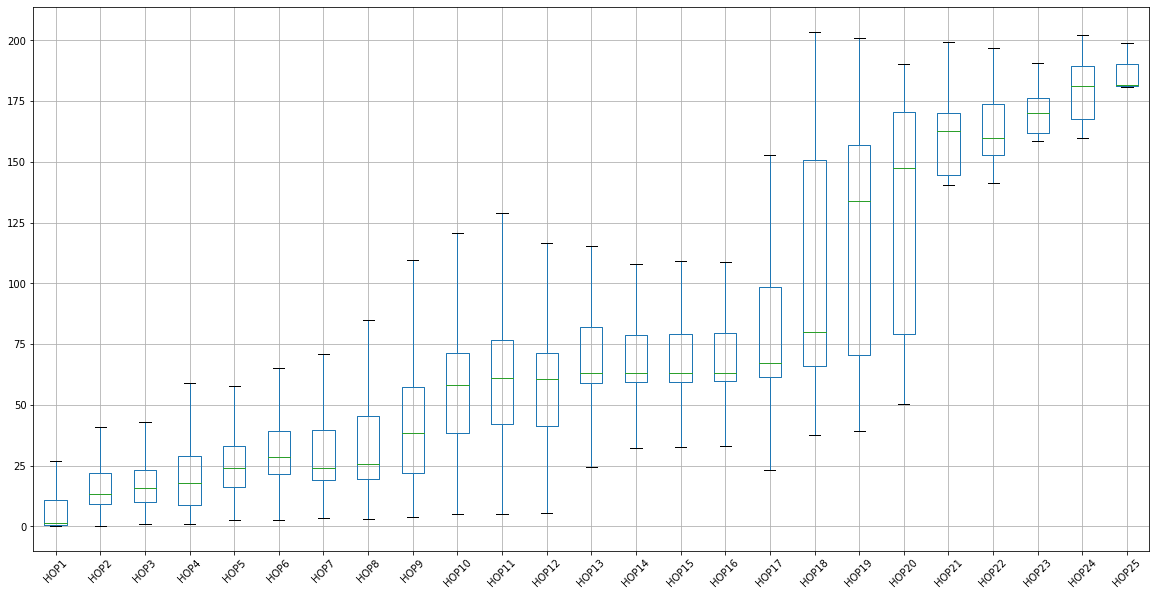

In [14]:
#distributions of Latency per HOP
tr2_hopdist=pd.DataFrame.from_dict(rf2)
tr2_hopdist.boxplot(rot=45, figsize=(20, 10),  showfliers=False)

In [15]:
dfj=pd.DataFrame({'size':tr1_sites.groupby('id', as_index=False).size()}).reset_index()
pd.merge(dfj, di, left_on='id', right_on='sid')

,id,size,Unnamed: 0,bid,sid,city_x,ip,country_x,v,datels,...,city_y,state,country_y,lat,long,isp,org,domain,ASorg,hits
0,test_3515,10,9,PIB827EB0C88E4,test_3515,chicago area,216.80.25.62,US,612,2019-06-19,...,Chicago,IL,US,41.9555,-87.6613,RCN,RCN,rcncustomer.com,RCN,NaN
1,test_9892,1,16,PIB827EBFD109B,test_9892,nyc,24.90.89.250,US,612,2019-06-19,...,Brooklyn,NY,US,40.7009,-73.9461,Spectrum,Spectrum,rr.com,Charter Communications Inc,NaN


In [16]:
pd.set_option('display.max_colwidth', -1)

In [17]:
tr1_sites[tr1_sites['id']=='test_9892'][['Cities', 'DestHostname', 'DestHostGeoIP']]

,Cities,DestHostname,DestHostGeoIP
0,"[New York NY US, New York NY US, Englewood CO US, Orléans 45 FR, Dublin L IE]",irokotv.com,"{'lat': '53.3338', 'city': 'Dublin', 'ASorg': 'Amazon.com Inc.', 'country': 'IE', 'isp': 'Amazon.com', 'long': '-6.2488', 'hits': '', 'org': 'Amazon.com', 'domain': 'amazonaws.com', 'state': 'L', 'ip': '52.17.177.228'}"


In [18]:
pd.set_option('display.max_colwidth', -1)
tr1_sites[tr1_sites['id']=='test_3515'][['Cities', 'DestHostname', 'DestHostGeoIP']]

,Cities,DestHostname,DestHostGeoIP
1,"[Chicago IL US, Albrightsville PA US, Albrightsville PA US, Bethlehem PA US]",www.nhk.or.jp,"{'lat': '37.751', 'city': '', 'ASorg': 'Akamai Technologies Inc.', 'country': 'US', 'isp': 'Akamai Technologies', 'long': '-97.822', 'hits': '', 'org': 'Akamai Technologies', 'domain': 'akamaitechnologies.com', 'state': '', 'ip': '23.59.21.123'}"
2,"[Chicago IL US, Albrightsville PA US, Albrightsville PA US, Catasauqua PA US, Bethlehem PA US]",www.nhk.or.jp,"{'lat': '37.751', 'city': '', 'ASorg': 'Akamai Technologies Inc.', 'country': 'US', 'isp': 'Akamai Technologies', 'long': '-97.822', 'hits': '', 'org': 'Akamai Technologies', 'domain': 'akamaitechnologies.com', 'state': '', 'ip': '23.36.33.34'}"
3,"[Chicago IL US, Albrightsville PA US, Albrightsville PA US, Catasauqua PA US, Bethlehem PA US]",www.nhk.or.jp,"{'lat': '37.751', 'city': '', 'ASorg': 'Akamai Technologies Inc.', 'country': 'US', 'isp': 'Akamai Technologies', 'long': '-97.822', 'hits': '', 'org': 'Akamai Technologies', 'domain': 'akamaitechnologies.com', 'state': '', 'ip': '23.36.33.34'}"
4,"[Chicago IL US, Albrightsville PA US, Albrightsville PA US, Bethlehem PA US]",www.nhk.or.jp,"{'lat': '37.751', 'city': '', 'ASorg': 'Akamai Technologies Inc.', 'country': 'US', 'isp': 'Akamai Technologies', 'long': '-97.822', 'hits': '', 'org': 'Akamai Technologies', 'domain': 'akamaitechnologies.com', 'state': '', 'ip': '23.59.21.123'}"
5,"[Chicago IL US, Albrightsville PA US, Albrightsville PA US, Catasauqua PA US, Bethlehem PA US]",www.nhk.or.jp,"{'lat': '37.751', 'city': '', 'ASorg': 'Akamai Technologies Inc.', 'country': 'US', 'isp': 'Akamai Technologies', 'long': '-97.822', 'hits': '', 'org': 'Akamai Technologies', 'domain': 'akamaitechnologies.com', 'state': '', 'ip': '23.36.33.34'}"
6,"[Chicago IL US, Albrightsville PA US, Albrightsville PA US]",www.lemonde.fr,"{'lat': '41.8483', 'city': 'Chicago', 'ASorg': 'Fastly', 'country': 'US', 'isp': 'Fastly', 'long': '-87.6517', 'hits': '', 'org': 'Fastly', 'domain': '', 'state': 'IL', 'ip': '151.101.186.217'}"
7,"[Chicago IL US, Albrightsville PA US, Albrightsville PA US]",www.lemonde.fr,"{'lat': '41.8483', 'city': 'Chicago', 'ASorg': 'Fastly', 'country': 'US', 'isp': 'Fastly', 'long': '-87.6517', 'hits': '', 'org': 'Fastly', 'domain': '', 'state': 'IL', 'ip': '151.101.186.217'}"
8,"[Chicago IL US, Albrightsville PA US, Albrightsville PA US]",www.lemonde.fr,"{'lat': '41.8483', 'city': 'Chicago', 'ASorg': 'Fastly', 'country': 'US', 'isp': 'Fastly', 'long': '-87.6517', 'hits': '', 'org': 'Fastly', 'domain': '', 'state': 'IL', 'ip': '151.101.186.217'}"
9,"[Chicago IL US, Albrightsville PA US, Albrightsville PA US]",www.lemonde.fr,"{'lat': '41.8483', 'city': 'Chicago', 'ASorg': 'Fastly', 'country': 'US', 'isp': 'Fastly', 'long': '-87.6517', 'hits': '', 'org': 'Fastly', 'domain': '', 'state': 'IL', 'ip': '151.101.186.217'}"
10,"[Chicago IL US, Albrightsville PA US, Albrightsville PA US]",www.lemonde.fr,"{'lat': '41.8483', 'city': 'Chicago', 'ASorg': 'Fastly', 'country': 'US', 'isp': 'Fastly', 'long': '-87.6517', 'hits': '', 'org': 'Fastly', 'domain': '', 'state': 'IL', 'ip': '151.101.186.217'}"


In [88]:
tr1.groupby(['id','DestHostname']).size()

id         DestHostname      
test_1048  irokotv.com           5
           www.choicetv.co.nz    5
           www.globo.com         5
           www.lemonde.fr        5
           www.nhk.or.jp         5
           www.tvnz.co.nz        5
test_1164  irokotv.com           5
           www.choicetv.co.nz    5
           www.globo.com         5
           www.lemonde.fr        5
           www.nhk.or.jp         5
           www.tvnz.co.nz        5
test_1206  irokotv.com           5
           www.choicetv.co.nz    5
           www.globo.com         5
           www.lemonde.fr        5
           www.nhk.or.jp         5
           www.tvnz.co.nz        5
test_1332  irokotv.com           5
           www.choicetv.co.nz    5
           www.globo.com         5
           www.lemonde.fr        5
           www.nhk.or.jp         5
           www.tvnz.co.nz        5
test_1372  irokotv.com           5
           www.choicetv.co.nz    5
           www.globo.com         5
           www.lemonde.fr

In [20]:
tr1[(tr1['DestHostname']=='www.tvnz.co.nz') & (tr1['PercentOfUnresolvedCities'] < 0.20) & (tr1['id']=='test_4287')][['id','city_y','Cities','ISPs']]


,id,city_y,Cities,ISPs
360,test_4287,Park Ridge,"[Park Ridge IL US, Reynoldsburg OH US, Reynoldsburg OH US, Huntsville AL US, Western Springs IL US, Carol Stream IL US, Evansville IN US, Evansville IN US, Evansville IN US, , San Jose CA US, Auckland AUK NZ, Auckland AUK NZ, Auckland AUK NZ, Auckland AUK NZ]","[WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, Equinix, Vocus Connect International Backbone, Vocus, Vocus, Vocus, Vocus]"
361,test_4287,Park Ridge,"[Park Ridge IL US, Reynoldsburg OH US, Reynoldsburg OH US, Huntsville AL US, Western Springs IL US, Carol Stream IL US, Evansville IN US, Evansville IN US, Evansville IN US, , San Jose CA US, San Jose CA US, Auckland AUK NZ, Auckland AUK NZ, Auckland AUK NZ, Auckland AUK NZ]","[WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, Equinix, Vocus Connect International Backbone, Vocus Connect International Backbone, Vocus, Vocus, Vocus, Vocus Communications]"
362,test_4287,Park Ridge,"[Park Ridge IL US, Reynoldsburg OH US, Reynoldsburg OH US, Huntsville AL US, Western Springs IL US, Carol Stream IL US, Evansville IN US, Evansville IN US, Evansville IN US, , San Jose CA US, Auckland AUK NZ, Auckland AUK NZ, Auckland AUK NZ]","[WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, Equinix, Vocus Connect International Backbone, Vocus, Vocus, Vocus Communications]"
363,test_4287,Park Ridge,"[Park Ridge IL US, Reynoldsburg OH US, Reynoldsburg OH US, Huntsville AL US, Western Springs IL US, Carol Stream IL US, Evansville IN US, Evansville IN US, Evansville IN US, , San Jose CA US, San Jose CA US, Auckland AUK NZ, Auckland AUK NZ, Auckland AUK NZ, Auckland AUK NZ]","[WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, Equinix, Vocus Connect International Backbone, Vocus Connect International Backbone, Vocus, Vocus Communications, Vocus, Vocus Communications]"
364,test_4287,Park Ridge,"[Park Ridge IL US, Reynoldsburg OH US, Reynoldsburg OH US, Huntsville AL US, Western Springs IL US, Carol Stream IL US, Evansville IN US, Evansville IN US, Evansville IN US, , San Jose CA US, San Jose CA US, Auckland AUK NZ, Auckland AUK NZ, Auckland AUK NZ]","[WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, WideOpenWest, Equinix, Vocus Connect International Backbone, Vocus Connect International Backbone, Vocus, Vocus Communications, Vocus Communications]"


In [21]:
tr1[(tr1['DestHostname']=='irokotv.com') & (tr1['PercentOfUnresolvedCities'] < 0.20)][['id','city_y','Cities','ISPs', 'PercentOfUnresolvedCities']]


,id,city_y,Cities,ISPs,PercentOfUnresolvedCities
42,test_1464,Brooklyn,"[New York NY US, New York NY US, Englewood CO US, Englewood CO US, New York NY US, New York NY US, , Lisbon 11 PT]","[Spectrum, Spectrum, Spectrum, Spectrum, Tata Communications (america), Tata Communications (america), Tata Communications (america), Tata Communications (america)]",0.125
190,test_9892,Brooklyn,"[New York NY US, New York NY US, Englewood CO US, Orléans 45 FR, Dublin L IE]","[Spectrum, Spectrum, Spectrum, Level 3 Communications, Amazon Data Services Ireland Ltd]",0.000


In [22]:

tr2[(tr2['PercentOfUnresolvedCities'] < 0.20)][['id','city_x','Cities','ISPs', 'Meta']]

,id,city_x,Cities,ISPs,Meta
567,test_3515,chicago area,"[Chicago IL US, Albrightsville PA US, Albrightsville PA US, Ashburn VA US, Ashburn VA US, Ashburn VA US, Seattle WA US, Ashburn VA US, Seattle WA US, Seattle WA US, Seattle WA US]","[RCN, RCN, RCN, Amazon.com, Amazon.com, Amazon.com, Amazon.com, Amazon.com, Amazon.com, Amazon.com, Amazon.com]",Amazon
568,test_3515,chicago area,"[Chicago IL US, Albrightsville PA US, Albrightsville PA US, Ashburn VA US, Ashburn VA US, Ashburn VA US, Ashburn VA US]","[RCN, RCN, RCN, Amazon.com, Amazon.com, Amazon.com, Amazon.com]",Amazon
569,test_3515,chicago area,"[Chicago IL US, Albrightsville PA US, Albrightsville PA US, Ashburn VA US, Ashburn VA US, Ashburn VA US, Seattle WA US, Seattle WA US]","[RCN, RCN, RCN, Amazon.com, Amazon.com, Amazon.com, Amazon.com, Amazon.com]",Amazon
606,test_9892,nyc,"[New York NY US, New York NY US, Englewood CO US, Ashburn VA US, Ashburn VA US, Ashburn VA US, Ashburn VA US]","[Spectrum, Spectrum, Spectrum, Amazon.com, Amazon.com, Amazon.com, Amazon.com]",Hulu
607,test_9892,nyc,"[New York NY US, New York NY US, , Ashburn VA US, Ashburn VA US, Ashburn VA US, Ashburn VA US]","[Spectrum, Spectrum, Spectrum, Amazon.com, Amazon.com, Amazon.com, Amazon.com]",Hulu
608,test_9892,nyc,"[New York NY US, New York NY US, , Ashburn VA US, Ashburn VA US, Ashburn VA US, Ashburn VA US]","[Spectrum, Spectrum, Spectrum, Amazon.com, Amazon.com, Amazon.com, Amazon.com]",Hulu
678,test_3515,chicago area,"[Chicago IL US, Albrightsville PA US, Albrightsville PA US, Ashburn VA US, Ashburn VA US, Ashburn VA US, Seattle WA US, Seattle WA US, Seattle WA US, Seattle WA US, Seattle WA US]","[RCN, RCN, RCN, Amazon.com, Amazon.com, Amazon.com, Amazon.com, Amazon.com, Amazon.com, Amazon.com, Amazon.com]",Amazon
679,test_3515,chicago area,"[Chicago IL US, Albrightsville PA US, Albrightsville PA US, Ashburn VA US, Ashburn VA US, Ashburn VA US, Seattle WA US]","[RCN, RCN, RCN, Amazon.com, Amazon.com, Amazon.com, Amazon.com]",Amazon
680,test_3515,chicago area,"[Chicago IL US, Albrightsville PA US, Albrightsville PA US, Ashburn VA US, Ashburn VA US, Ashburn VA US, Seattle WA US, Seattle WA US, Ashburn VA US, Seattle WA US, Seattle WA US, Seattle WA US, Seattle WA US]","[RCN, RCN, RCN, Amazon.com, Amazon.com, Amazon.com, Amazon.com, Amazon.com, Amazon.com, Amazon.com, Amazon.com, Amazon.com, Amazon.com]",Amazon
1029,test_9892,nyc,"[New York NY US, New York NY US, Englewood CO US, , Ashburn VA US, Ashburn VA US]","[Spectrum, Spectrum, Spectrum, Spectrum, Amazon.com, Amazon.com]",Hulu


In [23]:
tr2.groupby('city_x').size()

city_x
chicago area         2382
dc                   2247
detroit area         2118
la                   3903
maplewood nj         1365
maryland/dc area     543 
nyc                  2808
nyc (long island)    2046
san francisco        894 
dtype: int64

In [24]:
#pretty print traceroute data
def printAnswers(id, nbrOfNetFlix, nbrOfNetFlixLong, nbrOfRegRoutes, nbrOfLongRoutes, Unresolved): #TODO Don't repeat yr self
    print("----------------------------------------")
    df_NetFlix=tr2[(tr2.id == id) & (tr2.Meta=='Netflix') &
                   (tr2['PercentOfUnresolvedCities'] < Unresolved) &
                   (tr2['NbrOfBigISPs'] < 3)].head(nbrOfNetFlix)
    for i,row in df_NetFlix.iterrows():
        id=row.id
        print("ID: "+id)
        print("Application: "+row.Meta)
        print("Location and ISP: "+di_dict[id]['city_y']+","+di_dict[id]['state']+" / "+di_dict[id]['isp'])
        print("Type: Route to NetFlix")
        print("ISPs:" + str(row.NbrOfBigISPs))
        c = ""
        i = 0
        for city in row.Cities:
            if c != city: #DO NOT REPEAT CITY: TODO avg?
                print("HOP"+str(i+1)+" City:"+city+", ISP:"+row.ISPs[i]+", Latency:"+str(row.RTTs[i]))
                c=city
            #print("HOP"+str(i+1)+" City:"+city+" ISP:"+row.ISP[i]+", Latency:"+str(row.RTTs[i]))
            i+=1
        print("Destination: "+str(row.DestHostGeoIP['city'])+","+str(row.DestHostGeoIP['state'])+
              " ("+str(row.DestHostGeoIP['ASorg'])+").")
        
        print("\n")

    df_NetFlixLong=tr2[(tr2.id == id) & (tr2.Meta=='Netflix') &
                   (tr2['PercentOfUnresolvedCities'] < Unresolved) &
                   (tr2['NbrOfBigISPs'] > 2)].head(nbrOfNetFlixLong)
    for i,row in df_NetFlixLong.iterrows():
        id=row.id
        print("ID: "+id)
        print("Application: "+row.Meta)
        print("Location and ISP: "+di_dict[id]['city_y']+","+di_dict[id]['state']+" / "+di_dict[id]['isp'])
        print("Type: Route to NetFlix")
        print("ISPs:" + str(row.NbrOfBigISPs))
        c = ""
        i = 0
        for city in row.Cities:
            if c != city: #DO NOT REPEAT CITY: TODO avg?
                print("HOP"+str(i+1)+" City:"+city+", ISP:"+row.ISPs[i]+", Latency:"+str(row.RTTs[i]))
                c=city
            #print("HOP"+str(i+1)+" City:"+city+" ISP:"+row.ISP[i]+", Latency:"+str(row.RTTs[i]))
            i+=1
        print("Destination: "+str(row.DestHostGeoIP['city'])+","+str(row.DestHostGeoIP['state'])+
              " ("+str(row.DestHostGeoIP['ASorg'])+").")
        
        print("\n")
    df_RegRoutes=tr2[(tr2.id == id) & (tr2.Meta!='Netflix') &
                   (tr2['PercentOfUnresolvedCities'] < Unresolved) &
                   (tr2['NbrOfBigISPs'] < 3)].head(nbrOfRegRoutes)
    for i,row in df_RegRoutes.iterrows():
        id=row.id
        print("ID: "+id)
        print("Application: "+row.Meta)
        print("Location and ISP: "+di_dict[id]['city_y']+","+di_dict[id]['state']+" / "+di_dict[id]['isp'])
        print("Type: Route to Application")
        print("ISPs:" + str(row.NbrOfBigISPs))
        c = ""
        i = 0
        for city in row.Cities:
            if c != city: #DO NOT REPEAT CITY: TODO avg?
                print("HOP"+str(i+1)+" City:"+city+", ISP:"+row.ISPs[i]+", Latency:"+str(row.RTTs[i]))
                c=city
            #print("HOP"+str(i+1)+" City:"+city+" ISP:"+row.ISP[i]+", Latency:"+str(row.RTTs[i]))
            i+=1
        print("Destination: "+str(row.DestHostGeoIP['city'])+","+str(row.DestHostGeoIP['state'])+
              " ("+str(row.DestHostGeoIP['ASorg'])+").")
        
        print("\n")

    df_LongRoutes=tr2[(tr2.id == id) & (tr2.Meta!='Netflix') &
                   (tr2['PercentOfUnresolvedCities'] < Unresolved) &
                   (tr2['NbrOfBigISPs'] > 2)].head(nbrOfLongRoutes)
    for i,row in df_LongRoutes.iterrows():
        id=row.id
        print("ID: "+id)
        print("Application: "+row.Meta)
        print("Location and ISP: "+di_dict[id]['city_y']+","+di_dict[id]['state']+" / "+di_dict[id]['isp'])
        print("Type: Route to Application Through Long List of ISPs")
        print("ISPs:" + str(row.NbrOfBigISPs))
        c = ""
        i = 0
        for city in row.Cities:
            if c != city: #DO NOT REPEAT CITY: TODO avg?
                print("HOP"+str(i+1)+" City:"+city+", ISP:"+row.ISPs[i]+", Latency:"+str(row.RTTs[i]))
                c=city
            #print("HOP"+str(i+1)+" City:"+city+" ISP:"+row.ISP[i]+", Latency:"+str(row.RTTs[i]))
            i+=1
        print("Destination: "+str(row.DestHostGeoIP['city'])+","+str(row.DestHostGeoIP['state'])+
              " ("+str(row.DestHostGeoIP['ASorg'])+").")
        
        print("\n")
        
        
#printAnswers("test_4287", 2,0,0,0, 0.20)
for dev in list(di_dict.keys()):
    printAnswers(dev, 2, 2, 2 ,2, 0.20)

----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
ID: test_3515
Application: Netflix
Location and ISP: Chicago,IL / RCN
Type: Route to NetFlix
ISPs:2
HOP1 City:Chicago IL US, ISP:RCN, Latency:21.45
HOP2 City:Albrightsville PA US, ISP:RCN, Latency:22.375
HOP4 City:Secaucus NJ US, ISP:Equinix, Latency:21.225
Destination: , (Netflix Streaming Services Inc.).


ID: test_3515
Application: Netflix
Location and ISP: Chicago,IL / RCN
Type: Route to NetFlix
ISPs:2
HOP1 City:Chicago IL US, ISP:RCN, Latency:11.225000000000001
HOP2 City:Albrightsville PA US, ISP:RCN, Latency:11.774999999999999
HOP4 City:Secaucus NJ US, ISP:Equinix, Latency:18.7

----------------------------------------
----------------------------------------
ID: test_4287
Application: Netflix
Location and ISP: Park Ridge,IL / WideOpenWest
Type: Route to NetFlix
ISPs:2
HOP1 City:Park Ridge IL US, ISP:WideOpenWest, Latency:3.4
HOP2 City:Reynoldsburg OH US, ISP:WideOpenWest, Latency:21.200000000000003
HOP4 City:Huntsville AL US, ISP:WideOpenWest, Latency:23.025
HOP5 City:Western Springs IL US, ISP:WideOpenWest, Latency:30.025
HOP6 City:Carol Stream IL US, ISP:WideOpenWest, Latency:35.275
HOP7 City:Evansville IN US, ISP:WideOpenWest, Latency:26.950000000000003
HOP8 City:St. Petersburg FL US, ISP:WideOpenWest, Latency:25.2
HOP9 City:Evansville IN US, ISP:WideOpenWest, Latency:45.925
HOP10 City:, ISP:Netflix Streaming Services, Latency:48.75
Destination: , (Netflix Streaming Services Inc.).


ID: test_4287
Application: Netflix
Location and ISP: Park Ridge,IL / WideOpenWest
Type: Route to NetFlix
ISPs:2
HOP1 City:Park Ridge IL US, ISP:WideOpenWest, Latency:3.225
HOP

----------------------------------------
----------------------------------------
----------------------------------------


In [43]:
list_up=['test_1048','test_1206','test_1332','test_1372','test_1464','test_1769','test_1786','test_1831','test_1962','test_3515','test_4287','test_4727','test_5124','test_5458','test_8128','test_8440','test_9892']
for i, row in di.iterrows():
    if row['sid'] in list_up:
        print(row[['sid','city_x']])

sid       test_5458   
city_x    maplewood nj
Name: 6, dtype: object
sid       test_1831   
city_x    detroit area
Name: 7, dtype: object
sid       test_3515   
city_x    chicago area
Name: 9, dtype: object
sid       test_1332   
city_x    detroit area
Name: 10, dtype: object
sid       test_1206       
city_x    maryland/dc area
Name: 11, dtype: object
sid       test_9892
city_x    nyc      
Name: 16, dtype: object
sid       test_4727
city_x    la       
Name: 17, dtype: object
sid       test_1464
city_x    nyc      
Name: 19, dtype: object
sid       test_1372        
city_x    nyc (long island)
Name: 22, dtype: object
sid       test_1786
city_x    la       
Name: 23, dtype: object
sid       test_4287   
city_x    chicago area
Name: 25, dtype: object
sid       test_1048
city_x    la       
Name: 37, dtype: object
sid       test_5124
city_x    nyc      
Name: 44, dtype: object
sid       test_1962    
city_x    san francisco
Name: 46, dtype: object
sid       test_1769
city_x    dc       

In [46]:
#list_up=['test_1048','test_1206','test_1332','test_1372','test_1464','test_1769','test_1786','test_1831','test_1962','test_3515','test_4287','test_4727','test_5124','test_5458','test_8128','test_8440','test_9892']
#for i, row in di.iterrows():
#    if row['sid'] in list_up:
#        print(row[['sid','city_x']])

printAnswers('test_1786', 8, 8, 2 ,2, 0.90)

----------------------------------------
ID: test_1786
Application: Netflix
Location and ISP: Los Angeles,CA / Spectrum
Type: Route to NetFlix
ISPs:1
HOP2 City:Calipatria CA US, ISP:Spectrum, Latency:36.175
HOP3 City:, ISP:Spectrum, Latency:35.8
Destination: , (Netflix Streaming Services Inc.).


ID: test_1786
Application: Netflix
Location and ISP: Los Angeles,CA / Spectrum
Type: Route to NetFlix
ISPs:1
HOP2 City:Calipatria CA US, ISP:Spectrum, Latency:35.45
HOP3 City:, ISP:Spectrum, Latency:35.075
Destination: , (Netflix Streaming Services Inc.).


ID: test_1786
Application: Netflix
Location and ISP: Los Angeles,CA / Spectrum
Type: Route to NetFlix
ISPs:1
HOP2 City:Calipatria CA US, ISP:Spectrum, Latency:31.875
HOP3 City:, ISP:Spectrum, Latency:31.424999999999997
Destination: , (Netflix Streaming Services Inc.).


ID: test_1786
Application: Netflix
Location and ISP: Los Angeles,CA / Spectrum
Type: Route to NetFlix
ISPs:1
HOP2 City:Calipatria CA US, ISP:Spectrum, Latency:76.075
HOP3 Ci

In [96]:
#WIP
import ast
def printRouteToSite(id, sitename, unresolved):
    df_Sites=tr1[(tr1['DestHostname']==sitename) & 
                 (tr1['PercentOfUnresolvedCities'] < unresolved) &
                 (tr1['id']==id)]
    for i,row in df_Sites.head(1).iterrows():
        print("ID: "+id)
        print("Location and ISP: "+di_dict[id]['city_y']+","+di_dict[id]['state']+" / "+di_dict[id]['isp'])
        print("Web Site: "+sitename)
        print("ISPs:" + str(row.NbrOfBigISPs))
        c = ""
        i = 0
        for hop in row.GeoIP:
            if hop=='{}': continue
            if hop=={}: continue
            print("HOP"+ str(i+1)+" City:"+hop['city']+ "," +hop['state']+","+hop['country']+
                 "  ASorg:"+hop['ASorg']+ "  Latency:"+str(row.RTTs[i]))
            
            i+=1
        print("Destination:" + str(row.DestHostGeoIP['city']) +","+ str(row.DestHostGeoIP['state'])+", ASorg:"+
            str(row.DestHostGeoIP['ASorg']))
        print("")

list_up=['test_1048','test_1206','test_1332','test_1372','test_1464','test_1769','test_1786','test_1831','test_1962','test_3515','test_4287','test_4727','test_5124','test_5458','test_8128','test_8440','test_9892']
#sites1=['irokotv.com','www.choicetv.co.nz','www.globo.com','www.lemonde.fr','www.nhk.or.jp','www.tvnz.co.nz']
sites1=['www.globo.com']

for d in list_up:
    for s in sites1:
        printRouteToSite(d, s, 0.9)

ID: test_1372
Location and ISP: Rockville Centre,NY / Verizon Fios
Web Site: www.globo.com
ISPs:4
HOP1 City:,,US  ASorg:MCI Communications Services  Inc. d/b/a Verizon Business  Latency:0.47500000000000003
HOP2 City:,,US  ASorg:  Latency:10.175
HOP3 City:Jamaica,NY,US  ASorg:MCI Communications Services  Inc. d/b/a Verizon Business  Latency:10.825000000000001
HOP4 City:,,US  ASorg:TATA COMMUNICATIONS (AMERICA) INC  Latency:9.425
Destination:Rio de Janeiro,RJ, ASorg:Globo Comunicação e Participaçoes SA

ID: test_1464
Location and ISP: Brooklyn,NY / Windstream Communications
Web Site: www.globo.com
ISPs:2
HOP1 City:New York,NY,US  ASorg:Charter Communications Inc  Latency:17.125
HOP2 City:New York,NY,US  ASorg:Charter Communications Inc  Latency:22.95
HOP3 City:Englewood,CO,US  ASorg:Charter Communications Inc  Latency:20.525
HOP4 City:,,US  ASorg:Charter Communications Inc  Latency:18.975
HOP5 City:Englewood,CO,US  ASorg:Charter Communications Inc  Latency:13.4
HOP6 City:New York,NY,US  